In [1]:
# Load required modules ===============================================================
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl

In [2]:
# Load data/Read in CSV files ===============================================================
best = pd.read_csv('(PS $2, PC $10)CEA - Best (PS $4, PC $4).csv')
worse = pd.read_csv('(PS $2, PC $10)CEA - Worse (PS $4, PC $4).csv')
best_line = pd.read_csv('(PS $2, PC $10)NMB-Best (PS $4, PC $4).csv')
worse_line = pd.read_csv('(PS $2, PC $10)NMB-Worse (PS $4, PC $4).csv')

In [3]:
worse_prevention_1 = worse[['dQALY','Prevention 1']]
worse_prevention_1 = worse_prevention_1.dropna(axis=0, how='any')
worse_prevention_2 = worse[['dQALY','Prevention 2']]
worse_prevention_2 = worse_prevention_2.dropna(axis=0, how='any')
worse_base_prime = worse[['dQALY','Base Prime']]
worse_base_prime = worse_base_prime.dropna(axis=0, how='any')
worse_wtp = worse[['dQALY','WTP of 1 GDP Per Capita']]
worse_wtp = worse_wtp.dropna(axis=0, how='any')
worse_frontier = worse[['dQALY','Frontier']]
worse_frontier = worse_frontier.dropna(axis=0, how='any')
worse_points = worse[['dQALY','Unnamed: 0', 'Centers']]
worse_points = worse_points.dropna(axis=0, how='any')
best_prevention_1 = best[['dQALY','Prevention 1']]
best_prevention_1 = best_prevention_1.dropna(axis=0, how='any')
best_prevention_2 = best[['dQALY','Prevention 2']]
best_prevention_2 = best_prevention_2.dropna(axis=0, how='any')
best_base_prime = best[['dQALY','Base Prime']]
best_base_prime = best_base_prime.dropna(axis=0, how='any')
best_wtp = best[['dQALY','WTP of 1 GDP Per Capita']]
best_wtp = best_wtp.dropna(axis=0, how='any')
best_frontier = best[['dQALY','Frontier']]
best_frontier = best_frontier.dropna(axis=0, how='any')
best_points = best[['dQALY','Unnamed: 0', 'Centers']]
best_points = best_points.dropna(axis=0, how='any')
worse.prevention_1 = worse_line[['WTP','Prevention 1']]
worse.prevention_1 = worse.prevention_1.dropna(axis=0, how='any')
worse.prevention_2 = worse_line[['WTP','Prevention 2']]
worse.prevention_2 = worse.prevention_2.dropna(axis=0, how='any')
worse.base_prime = worse_line[['WTP','Base Prime']]
worse.base_prime = worse.base_prime.dropna(axis=0, how='any')
best.prevention_1 = best_line[['WTP','Prevention 1']]
best.prevention_1 = best.prevention_1.dropna(axis=0, how='any')
best.prevention_2 = best_line[['WTP','Prevention 2']]
best.prevention_2 = best.prevention_2.dropna(axis=0, how='any')
best.base_prime = best_line[['WTP','Base Prime']]
best.base_prime = best.base_prime.dropna(axis=0, how='any')

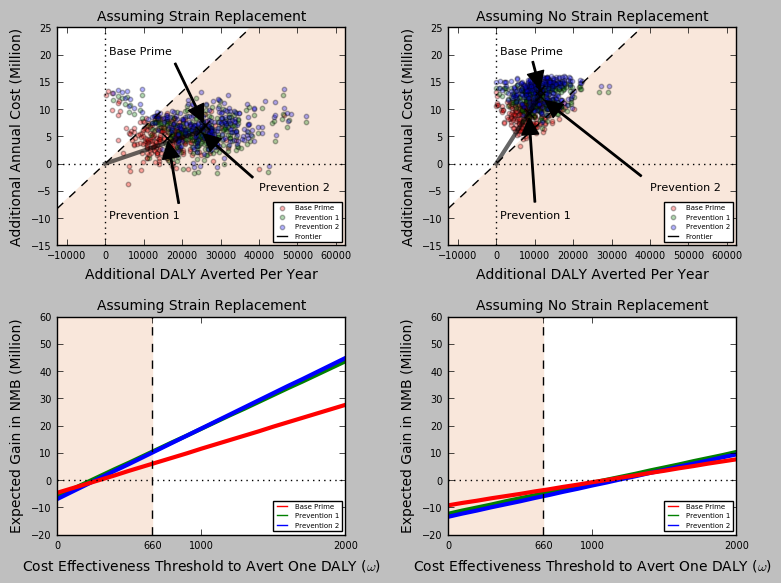

In [4]:
mpl.style.use('classic') # Use classic MPL layout
fig = plt.figure()
fig.add_subplot(221)
worse_base_prime.graph = plt.scatter(worse_base_prime['dQALY'], 
                                     worse_base_prime['Base Prime'], c='r', s=10, alpha = 0.3)
worse_prevention_1.graph = plt.scatter(worse_prevention_1['dQALY'], 
                                       worse_prevention_1['Prevention 1'], c='g', s=10, alpha = 0.3)
worse_prevention_2.graph = plt.scatter(worse_prevention_2['dQALY'], 
                                       worse_prevention_2['Prevention 2'], c='b', s=10, alpha = 0.3)
plt.plot(worse_frontier['dQALY'], worse_frontier['Frontier'], color = 'black', alpha = 0.6, linewidth = 3)
plt.scatter(worse_points['dQALY'], worse_points['Centers'], c='black', marker='x', s=50)
plt.annotate('Prevention 1', xy=(worse_points['dQALY'][1], 
                                 worse_points['Centers'][1]), 
             xytext=(1000, -10), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
plt.annotate('Prevention 2', xy=(worse_points['dQALY'][2], 
                                 worse_points['Centers'][2]), 
            xytext=(40000, -5), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
plt.annotate('Base Prime', xy=(worse_points['dQALY'][3], 
                               worse_points['Centers'][3]), 
             xytext=(1000, 20), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
m, b = np.polyfit(worse_wtp['dQALY'], worse_wtp['WTP of 1 GDP Per Capita'], 1)
wtp = plt.plot(np.array([-12500,62500]), m*np.array([-12500,62500]) + b, ls = '--', color = 'black')
plt.xlim([-12500,62500])
plt.ylim([-15,25])
plt.axvline(x=0, color='black', ls=':')
plt.axhline(y=0, color='black', ls=':')
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel('Additional DALY Averted Per Year', fontsize = 10)
plt.ylabel('Additional Annual Cost (Million)', fontsize = 10)
plt.title('Assuming Strain Replacement', fontsize = 10)
line_handle = mlines.Line2D([], [], color='black', ls='-')
plt.fill_between(np.array([-12500,62500]),  m*np.array([-12500,62500]) + b, -999999, color='#F9E7DB', zorder = 0)
plt.legend((worse_base_prime.graph, worse_prevention_1.graph, worse_prevention_2.graph, line_handle), 
           ('Base Prime', 'Prevention 1', 'Prevention 2', 'Frontier'),
           loc = 4, prop={'size':5}, scatterpoints = 1)
fig.add_subplot(222)
best_base_prime.graph = plt.scatter(best_base_prime['dQALY'], 
                                     best_base_prime['Base Prime'], c='r', s=10, alpha = 0.3)
best_prevention_1.graph = plt.scatter(best_prevention_1['dQALY'], 
                                       best_prevention_1['Prevention 1'], c='g', s=10, alpha = 0.3)
best_prevention_2.graph = plt.scatter(best_prevention_2['dQALY'], 
                                       best_prevention_2['Prevention 2'], c='b', s=10, alpha = 0.3)
plt.plot(best_frontier['dQALY'], best_frontier['Frontier'], color = 'black', alpha = 0.6, linewidth = 3)
plt.scatter(best_points['dQALY'], best_points['Centers'], c='black', marker='x', s=50)
plt.annotate('Prevention 1', xy=(best_points['dQALY'][1], 
                                 best_points['Centers'][1]), 
             xytext=(1000, -10), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
plt.annotate('Prevention 2', xy=(best_points['dQALY'][2], 
                                 best_points['Centers'][2]), 
            xytext=(40000, -5), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
plt.annotate('Base Prime', xy=(best_points['dQALY'][3], 
                               best_points['Centers'][3]), 
             xytext=(1000, 20), arrowprops=dict(facecolor='black', shrink=0.05, width = 1), fontsize = 8)
m, b = np.polyfit(best_wtp['dQALY'], best_wtp['WTP of 1 GDP Per Capita'], 1)
wtp = plt.plot(np.array([-12500,62500]), m*np.array([-12500,62500]) + b, ls = '--', color = 'black')
plt.xlim([-12500,62500])
plt.ylim([-15,25])
plt.axvline(x=0, color='black', ls=':')
plt.axhline(y=0, color='black', ls=':')
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlabel('Additional DALY Averted Per Year', fontsize = 10)
plt.ylabel('Additional Annual Cost (Million)', fontsize = 10)
plt.title('Assuming No Strain Replacement', fontsize = 10)
line_handle = mlines.Line2D([], [], color='black', ls='-')
plt.fill_between(np.array([-12500,62500]),  m*np.array([-12500,62500]) + b, -999999, color='#F9E7DB', zorder = 0)
plt.legend((best_base_prime.graph, best_prevention_1.graph, best_prevention_2.graph, line_handle), 
           ('Base Prime', 'Prevention 1', 'Prevention 2', 'Frontier'),
           loc = 4, prop={'size':5}, scatterpoints = 1)
fig.add_subplot(223)
worse.prevention_1.graph = plt.plot(worse.prevention_1['WTP'], 
                                    worse.prevention_1['Prevention 1'], color = 'green', linewidth = 3)
worse.prevention_2.graph = plt.plot(worse.prevention_2['WTP'], 
                                    worse.prevention_2['Prevention 2'], color = 'blue', linewidth = 3)
worse.base_prime.graph = plt.plot(worse.base_prime['WTP'], 
                                  worse.base_prime['Base Prime'], color = 'red', linewidth = 3)
plt.xticks([0,660,1000,2000], fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlim([-0,2000])
plt.ylim([-20,60])
plt.axvline(x=660, color='black', ls='--')
plt.axhline(y=0, color='black', ls=':')
plt.axvspan(0, 660, color='#F9E7DB')
plt.xlabel('Cost Effectiveness Threshold to Avert One DALY ($\omega$)', fontsize = 10)
plt.ylabel('Expected Gain in NMB (Million)', fontsize = 10)
plt.title('Assuming Strain Replacement', fontsize = 10)
red = mlines.Line2D([], [], color='red', ls='-')
green = mlines.Line2D([], [], color='green', ls='-')
blue = mlines.Line2D([], [], color='blue', ls='-')
plt.legend((red, green, blue), ('Base Prime', 'Prevention 1', 'Prevention 2',), loc = 4, prop={'size':5})
fig.add_subplot(224)
best.prevention_1.graph = plt.plot(best.prevention_1['WTP'], 
                                   best.prevention_1['Prevention 1'], color = 'green', linewidth = 3)
best.prevention_2.graph = plt.plot(best.prevention_2['WTP'], 
                                   best.prevention_2['Prevention 2'], color = 'blue', linewidth = 3)
best.base_prime.graph = plt.plot(best.base_prime['WTP'], 
                                 best.base_prime['Base Prime'], color = 'red', linewidth = 3)
plt.xticks([0,660,1000,2000], fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlim([-0,2000])
plt.ylim([-20,60])
plt.axvline(x=660, color='black', ls='--')
plt.axhline(y=0, color='black', ls=':')
plt.axvspan(0, 660, color='#F9E7DB')
plt.xlabel('Cost Effectiveness Threshold to Avert One DALY ($\omega$)', fontsize = 10)
plt.ylabel('Expected Gain in NMB (Million)', fontsize = 10)
plt.title('Assuming No Strain Replacement', fontsize = 10)
red = mlines.Line2D([], [], color='red', ls='-')
green = mlines.Line2D([], [], color='green', ls='-')
blue = mlines.Line2D([], [], color='blue', ls='-')
plt.legend((red, green, blue), ('Base Prime', 'Prevention 1', 'Prevention 2',), loc = 4, prop={'size':5})
plt.tight_layout() # Ensure tight layout so legend/labels are not cut off
plt.savefig('Economic Evaluation (PS $2, PC $10).pdf') # Save plot to PDF